# 美国citi Bike纽约 2018年1月数据分析

- - -

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['lqj'])
import time,datetime

In [2]:
cb1=pd.read_csv('201801.csv')

In [3]:
cb1.head()

tripduration                 starttime                  stoptime  \
0           970  2018-01-01 13:50:57.4340  2018-01-01 14:07:08.1860   
1           723  2018-01-01 15:33:30.1820  2018-01-01 15:45:33.3410   
2           496  2018-01-01 15:39:18.3370  2018-01-01 15:47:35.1720   
3           306  2018-01-01 15:40:13.3720  2018-01-01 15:45:20.1910   
4           306  2018-01-01 18:14:51.5680  2018-01-01 18:19:57.6420   

   start station id start station name  start station latitude  \
0                72   W 52 St & 11 Ave               40.767272   
1                72   W 52 St & 11 Ave               40.767272   
2                72   W 52 St & 11 Ave               40.767272   
3                72   W 52 St & 11 Ave               40.767272   
4                72   W 52 St & 11 Ave               40.767272   

   start station longitude  end station id         end station name  \
0               -73.993929             505          6 Ave & W 33 St   
1               -73.993929            3255          8 Ave & W 31 St   
2               -73.993929             525         W 34 St & 11 Ave   
3               -73.993929             447          8 Ave & W 52 St   
4               -73.993929            3356  Amsterdam Ave & W 66 St   

   end station latitude  end station longitude  bikeid    usertype  \
0             40.749013             -73.988484   31956  Subscriber   
1             40.750585             -73.994685   32536  Subscriber   
2             40.755942             -74.002116   16069  Subscriber   
3             40.763707             -73.985162   31781  Subscriber   
4             40.774667             -73.984706   30319  Subscriber   

   birth year  gender  
0        1992       1  
1        1969       1  
2        1956       1  
3        1974       1  
4        1992       1

In [4]:
cb1.info()
#概览:列分为:时间(起始时间点,骑行持续时间(int)),地点(起始地点id、名称、经纬度),车id(唯一标识),人物(性别,年龄,用户类型)
#没有缺失数据,但部分类型不正确,是否需要转型?如starttime为object类型,

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718994 entries, 0 to 718993
Data columns (total 15 columns):
tripduration               718994 non-null int64
starttime                  718994 non-null object
stoptime                   718994 non-null object
start station id           718994 non-null int64
start station name         718994 non-null object
start station latitude     718994 non-null float64
start station longitude    718994 non-null float64
end station id             718994 non-null int64
end station name           718994 non-null object
end station latitude       718994 non-null float64
end station longitude      718994 non-null float64
bikeid                     718994 non-null int64
usertype                   718994 non-null object
birth year                 718994 non-null int64
gender                     718994 non-null int64
dtypes: float64(4), int64(6), object(5)
memory usage: 82.3+ MB


In [5]:
cb1.shape
#1月份共有骑行记录718994条

(718994, 15)

In [29]:
# type(cb1.iloc[0].tripduration)#int类型
# type(cb1.iloc[0].starttime)#str类型   将其转换为datimeindex
# type(cb1.iloc[0].stoptime)#str类型   将其转换为datimeindex
# type(cb1.iloc[0].'start station name')#str类型
# type(cb1.iloc[0].'end station name')#str类型
type(cb1.iloc[0]['birth year'])#int类型   暂时不将其转换为datimeindex

numpy.int64

In [6]:
cb1['starttime']=pd.to_datetime(cb1['starttime'])

In [7]:
cb1['stoptime']=pd.to_datetime(cb1['stoptime'])

In [70]:
cb1.info()
#再次查看一成功转换

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718994 entries, 0 to 718993
Data columns (total 16 columns):
tripduration               718994 non-null int64
starttime                  718994 non-null datetime64[ns]
stoptime                   718994 non-null datetime64[ns]
start station id           718994 non-null int64
start station name         718994 non-null object
start station latitude     718994 non-null float64
start station longitude    718994 non-null float64
end station id             718994 non-null int64
end station name           718994 non-null object
end station latitude       718994 non-null float64
end station longitude      718994 non-null float64
bikeid                     718994 non-null int64
usertype                   718994 non-null object
birth year                 718994 non-null int64
gender                     718994 non-null int64
group_tripduration         718989 non-null category
dtypes: category(1), datetime64[ns](2), float64(4), int64(6), object(3)
m

In [ ]:
#按照相同的方法将cb2-cb12处理后进行合并数据，本次只分析201801月数据，暂不作处理
# cb=cb1.append(cb2,ignore_index=False)

In [ ]:
#首先对单月数据进行逐个因素分析

In [45]:
#1月骑行持续时间描述:
cb1['tripduration'].describe()
#可见平均骑行时间13.78分钟,最少骑行时间61秒(这是因为录入数据时已经将<=60秒的数据剔除了),最多骑行时间325167分钟(不合理数据),
# 75%分位数时间为842秒也即14分钟,大部分骑行时间较短,故短时间内的桶划分较多而密集,长时间的桶少

count    7.189940e+05
mean     8.268107e+02
std      3.279694e+04
min      6.100000e+01
25%      3.190000e+02
50%      5.100000e+02
75%      8.420000e+02
max      1.951005e+07
Name: tripduration, dtype: float64

In [38]:
cb1['tripduration'][cb1['tripduration']>60*60].count()
#骑行时间大于1小时的记录有2423次

2423

In [9]:
#根据以上describe,自定义bins,划分为6个区间0-2-5-10-15-20-25-30-45-60-infinite
bins = [0, 2*60,5*60,10*60, 15*60,20*60,25*60,30*60,45*60,60*60,2825827]
group_tripduration = ['1-2m', '2-5m', '5-10m', '10-15m', '15-20m','20-25m','25-30m','30-45m','45-60m', '>60m']
cb1['group_tripduration'] = pd.cut(cb1['tripduration'], bins, labels=group_tripduration)
#将划分好的数据装入桶中,并用group_tripduration的自定义名称作为数据对应进行标识

In [10]:
cb1.head()

tripduration               starttime                stoptime  \
0           970 2018-01-01 13:50:57.434 2018-01-01 14:07:08.186   
1           723 2018-01-01 15:33:30.182 2018-01-01 15:45:33.341   
2           496 2018-01-01 15:39:18.337 2018-01-01 15:47:35.172   
3           306 2018-01-01 15:40:13.372 2018-01-01 15:45:20.191   
4           306 2018-01-01 18:14:51.568 2018-01-01 18:19:57.642   

   start station id start station name  start station latitude  \
0                72   W 52 St & 11 Ave               40.767272   
1                72   W 52 St & 11 Ave               40.767272   
2                72   W 52 St & 11 Ave               40.767272   
3                72   W 52 St & 11 Ave               40.767272   
4                72   W 52 St & 11 Ave               40.767272   

   start station longitude  end station id         end station name  \
0               -73.993929             505          6 Ave & W 33 St   
1               -73.993929            3255          8 Ave & W 31 St   
2               -73.993929             525         W 34 St & 11 Ave   
3               -73.993929             447          8 Ave & W 52 St   
4               -73.993929            3356  Amsterdam Ave & W 66 St   

   end station latitude  end station longitude  bikeid    usertype  \
0             40.749013             -73.988484   31956  Subscriber   
1             40.750585             -73.994685   32536  Subscriber   
2             40.755942             -74.002116   16069  Subscriber   
3             40.763707             -73.985162   31781  Subscriber   
4             40.774667             -73.984706   30319  Subscriber   

   birth year  gender group_tripduration  
0        1992       1             15-20m  
1        1969       1             10-15m  
2        1956       1              5-10m  
3        1974       1              5-10m  
4        1992       1              5-10m

# 时间

#### 注意1月份为冬季,纽约纬度较高,昼短夜长

In [39]:
group_byMin=cb1[['tripduration','group_tripduration']].groupby('group_tripduration').count()
group_byMin
#单独生产一个dataframe,并用分组时间桶进行分组分别统计个数.

tripduration
group_tripduration              
0-2m                       15308
2-5m                      145827
5-10m                     262817
10-15m                    134512
15-20m                     67643
20-25m                     38008
25-30m                     22991
30-45m                     26364
45-60m                      3101
>60m                        2418

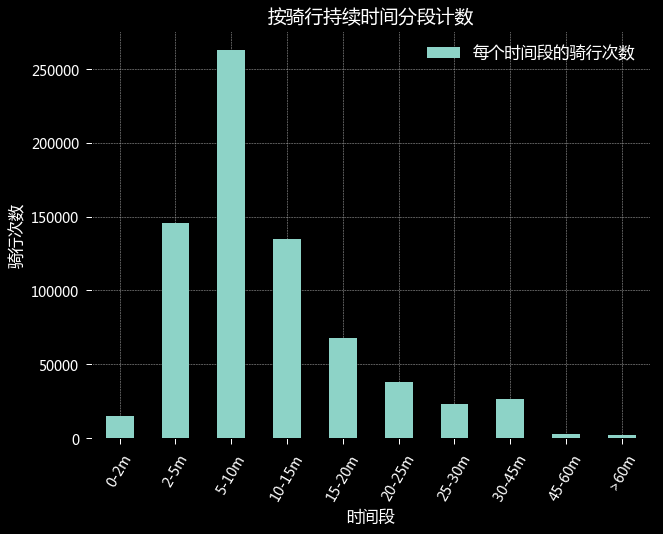

In [146]:
ax=group_byMin.plot(kind='bar',title='按骑行持续时间分段计数')
ax.set(xlabel="时间段", ylabel="骑行次数")
ax.tick_params(axis='x', rotation=60)
ax.legend(['每个骑行持续时间段的骑行次数'])
#可见绝大部分骑行持续时间在45分钟以内,可以考虑将45-60m与60m合并在一起(另外,可以考虑鼓励多骑行时间的优惠政策切入时间点在哪里？)

In [622]:
# cb1.head()

In [170]:
cb1_StartTime=cb1[['starttime','stoptime']].set_index('starttime')
cb1_StartTime.head()

stoptime
starttime                                      
2018-01-01 13:50:57.434 2018-01-01 14:07:08.186
2018-01-01 15:33:30.182 2018-01-01 15:45:33.341
2018-01-01 15:39:18.337 2018-01-01 15:47:35.172
2018-01-01 15:40:13.372 2018-01-01 15:45:20.191
2018-01-01 18:14:51.568 2018-01-01 18:19:57.642

In [172]:
cb1_StopTime=cb1[['starttime','stoptime']].set_index('stoptime')
cb1_StopTime.head()

starttime
stoptime                                       
2018-01-01 14:07:08.186 2018-01-01 13:50:57.434
2018-01-01 15:45:33.341 2018-01-01 15:33:30.182
2018-01-01 15:47:35.172 2018-01-01 15:39:18.337
2018-01-01 15:45:20.191 2018-01-01 15:40:13.372
2018-01-01 18:19:57.642 2018-01-01 18:14:51.568

In [173]:
#一天24个小时,从0-23点,统计每个小时内的骑行次数,注意:
# 00:00:00-00:59:59,算作0
# 07:00:00-07:59:59算作7
start_group_byHour=cb1_StartTime.groupby(cb1_StartTime.index.hour).count()
# cb1_StartTime.resample('h').count()此处用resample不正确,因为它是将各个日期分开算的
stop_group_byHour=cb1_StopTime.groupby(cb1_StopTime.index.hour).count()
#将starttime和stoptime提溜出来merge一个dataframe便于统计
startT_stopT=start_group_byHour.merge(stop_group_byHour,left_index=True,right_index=True)

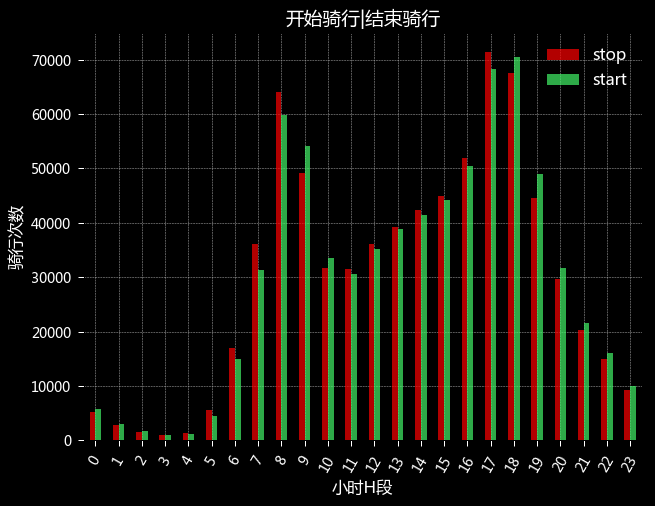

In [181]:
ax=startT_stopT.plot(title='开始骑行|结束骑行',kind='bar',color=['#FF0000','#42f468'],alpha=0.7)
ax.set(xlabel="小时H段", ylabel="骑行次数")
ax.tick_params(axis='x', rotation=60)
ax.legend(['stop','start'])
#可见早上[8,9]开始骑行和结束骑行的人达到了早高峰,[17点-18点]晚高峰

#更好的是将工作日与休息日分开统计！！！

# 地点

In [288]:
#查看在[8,9]点早高峰 骑行起始站点是哪些?
start_station_8_10=cb1.iloc[:,[3,4]].set_index(cb1['starttime'])
start_station_8_10=start_station_8_10[(start_station_8_10.index.hour>=8) & (start_station_8_10.index.hour<10)]
start_station_8_10.tail()
start_station_8_10=start_station_8_10['start station id'].value_counts()
start_station_8_10.index=start_station_8_10.index.astype(str)
start_station_8_10.head(10)

519     1577
3255    1216
432      949
517      888
490      884
523      851
465      695
545      684
433      655
435      645
487      613
3632     593
358      564
379      557
527      546
494      539
472      527
505      521
477      517
284      515
450      511
468      505
3164     500
504      498
482      495
461      488
359      488
3002     486
498      477
3263     473
174      471
173      469
492      464
438      459
127      456
285      455
3140     452
537      450
499      448
229      443
514      438
394      433
509      427
368      426
457      422
293      422
2012     421
459      420
410      418
518      417
Name: start station id, dtype: int64

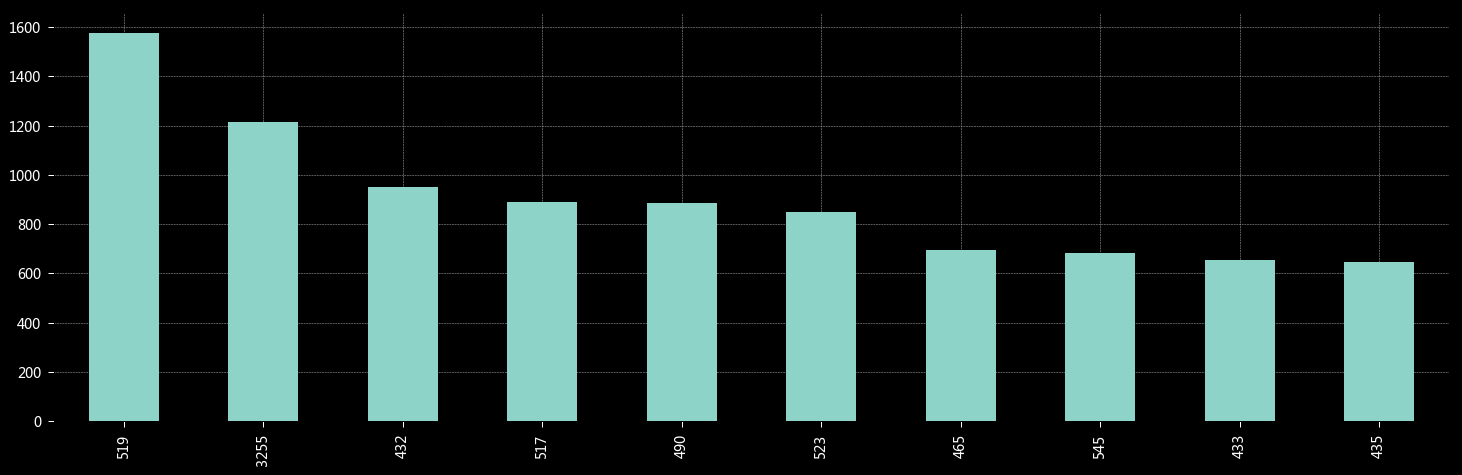

In [302]:
start_station_8_10.head(10).plot(kind='bar',figsize=(20,6))
#早8点到早10点开始骑行最多的前10个站点

In [299]:
#查看在[17,18]点 晚高峰 骑行起始站点是哪些?
start_station_17_19=cb1.iloc[:,[3,4]].set_index(cb1['starttime'])
start_station_17_19=start_station_17_19[(start_station_17_19.index.hour>=17) & (start_station_17_19.index.hour<19)]
start_station_17_19.tail()
start_station_17_19=start_station_17_19['start station id'].value_counts()
start_station_17_19.index=start_station_17_19.index.astype(str)
start_station_17_19.head(10)

519     2522
359     1687
402     1543
3443    1465
435     1100
497     1033
523      971
168      961
3641     959
490      893
Name: start station id, dtype: int64

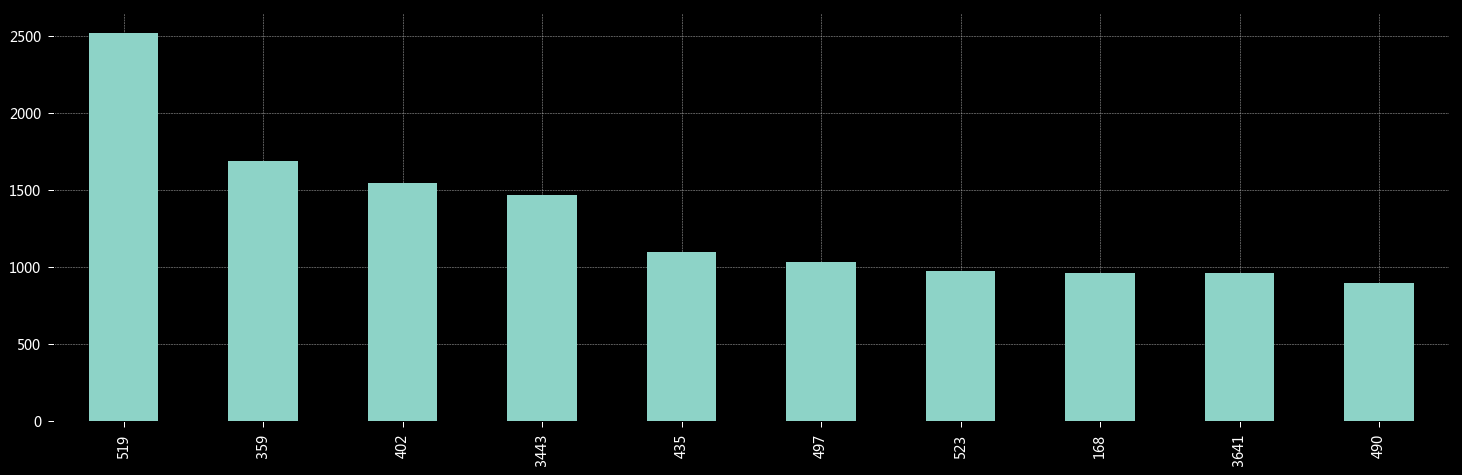

In [301]:
start_station_17_19.head(10).plot(kind='bar',figsize=(20,6))
#在17-19点之间骑行开始最多的前10个站点

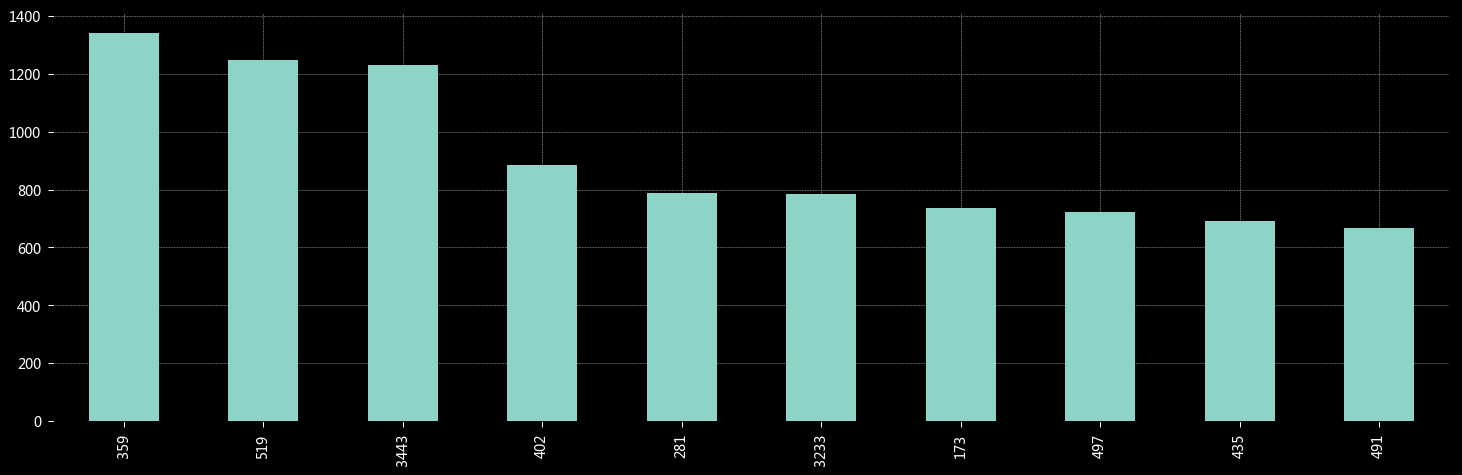

In [304]:
#同理查看在8-10点 早高峰骑行到达站点是哪些?
stop_station_8_10=cb1.iloc[:,[7,8]].set_index(cb1['stoptime'])
stop_station_8_10=stop_station_8_10[(stop_station_8_10.index.hour>=7) & (stop_station_8_10.index.hour<9)]
# stop_station_8_10.tail()
stop_station_8_10=stop_station_8_10['end station id'].value_counts()
stop_station_8_10.index=stop_station_8_10.index.astype(str)
stop_station_8_10.head(10).plot(kind='bar',figsize=(20,6))
#在8-10点之间骑行开始最多的前10个站点

In [309]:
stop_station_8_10.index[:10] & start_station_17_19.index[:10]
#早上到达和傍晚出发的前十大站点交集

Index(['359', '519', '3443', '402', '497', '435'], dtype='object')

#### 08-10 到达最多十大站点 359 519 3443 402 281 3233 173 497 435 491
#### 17-19 出发最多十大站点 519 359 402 3443 435 497 523 168 3641 490 

可见,早上到达的站点和傍晚出发的站点存在重合,尤其是前4名!

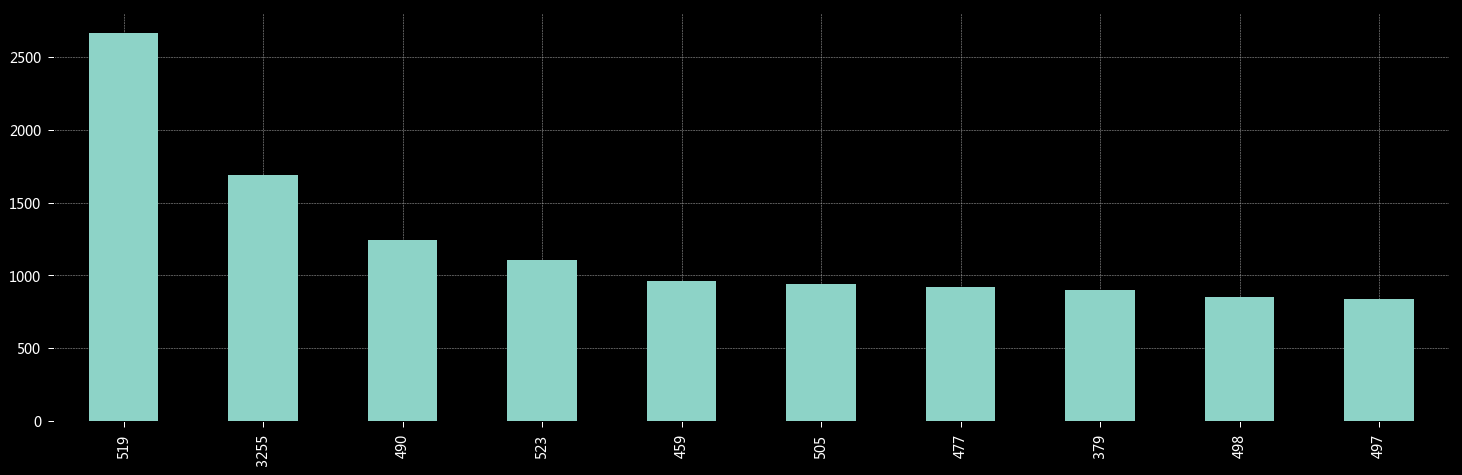

In [306]:
#同理查看在17-19点 晚高峰骑行到达站点是哪些?
stop_station_17_19=cb1.iloc[:,[7,8]].set_index(cb1['stoptime'])
stop_station_17_19=stop_station_17_19[(stop_station_17_19.index.hour>=17) & (stop_station_17_19.index.hour<19)]
stop_station_17_19.tail()
stop_station_17_19=stop_station_17_19['end station id'].value_counts()
stop_station_17_19.index=stop_station_17_19.index.astype(str)
stop_station_17_19.head(10).plot(kind='bar',figsize=(20,6))

In [310]:
start_station_8_10.index[:10] & stop_station_17_19.index[:10]
#早上出发,傍晚到达的前十名交集

Index(['519', '3255', '490', '523'], dtype='object')

08-10出发最多十大站点 519 3255 432 517 490 523 465 545 433 435

17-19到达最多十大站点 519 3255 490 523 459 505 477 379 498 497

早上出发,傍晚到达的前2名重合!

In [311]:
start_station_8_10.index[:10] & stop_station_17_19.index[:10] & stop_station_8_10.index[:10] & start_station_17_19.index[:10]
#早上到达 出发 晚上到达 出发 交集

Index(['519'], dtype='object')

08-10出发最多十大站点 519 3255 432 517 490 523 465 545 433 435

17-19到达最多十大站点 519 3255 490 523 459 505 477 379 498 497

08-10 到达最多十大站点 359 519 3443 402 281 3233 173 497 435 491

17-19 出发最多十大站点 519 359 402 3443 435 497 523 168 3641 490 

In [323]:
cb1['start station name'][cb1['start station id']==519].head()
# cb1[['start station latitude','start station longitude']][cb1['start station id']==519].head()
#519 Pershing Square North 位于纽约曼哈顿市中心

397584    Pershing Square North
397585    Pershing Square North
397586    Pershing Square North
397587    Pershing Square North
397588    Pershing Square North
Name: start station name, dtype: object

#### 概览

In [331]:
len(cb1['start station id'].unique())
#citibike站点共有763个

763

In [332]:
len(cb1['bikeid'].unique())
#citibike自行车总数10449辆

10449

In [342]:
#2018年1月每辆自行车租借频率
cb1['bikeid'].count()/len(cb1['bikeid'].unique())

68.80983826203465

In [344]:
#2018年1月每辆自行车每日租借频率
cb1['bikeid'].count()/len(cb1['bikeid'].unique())/31

2.2196722020011177

In [345]:
#每次租借平均时长(分钟)
cb1['tripduration'].sum()/cb1['bikeid'].count()/60

13.780177581454089

# 物 bikeID

In [362]:
#服务客户最多次数的十大bikeID
cb1['tripduration'].groupby(cb1['bikeid']).count().sort_values().tail(10)

bikeid
33447    206
32090    207
29957    209
29984    210
33105    214
32105    215
31623    215
31465    215
31962    217
31453    222
Name: tripduration, dtype: int64

In [379]:
# 头牌bike的旅程
bikeidGold=cb1[cb1['bikeid']==31453].set_index('starttime').sort_index()
bikeidGold.head(10)

tripduration                stoptime  \
starttime                                                       
2018-01-02 08:22:43.166           540 2018-01-02 08:31:43.705   
2018-01-02 19:03:17.000           734 2018-01-02 19:15:31.758   
2018-01-03 08:08:27.945           438 2018-01-03 08:15:46.532   
2018-01-03 08:21:38.223          1175 2018-01-03 08:41:13.440   
2018-01-03 08:45:44.391           807 2018-01-03 08:59:11.547   
2018-01-03 08:59:46.830           776 2018-01-03 09:12:42.941   
2018-01-03 10:20:00.830           572 2018-01-03 10:29:33.448   
2018-01-03 12:01:04.232           529 2018-01-03 12:09:53.378   
2018-01-03 12:20:03.841           603 2018-01-03 12:30:07.803   
2018-01-03 14:15:46.207           405 2018-01-03 14:22:31.697   

                         start station id       start station name  \
starttime                                                            
2018-01-02 08:22:43.166              3282          5 Ave & E 88 St   
2018-01-02 19:03:17.000              3136          5 Ave & E 63 St   
2018-01-03 08:08:27.945              3140          1 Ave & E 78 St   
2018-01-03 08:21:38.223              3143          5 Ave & E 78 St   
2018-01-03 08:45:44.391                72         W 52 St & 11 Ave   
2018-01-03 08:59:46.830              3175  W 70 St & Amsterdam Ave   
2018-01-03 10:20:00.830               517    Pershing Square South   
2018-01-03 12:01:04.232               497       E 17 St & Broadway   
2018-01-03 12:20:03.841               432        E 7 St & Avenue A   
2018-01-03 14:15:46.207               497       E 17 St & Broadway   

                         start station latitude  start station longitude  \
starttime                                                                  
2018-01-02 08:22:43.166               40.783070               -73.959390   
2018-01-02 19:03:17.000               40.766368               -73.971518   
2018-01-03 08:08:27.945               40.771404               -73.953517   
2018-01-03 08:21:38.223               40.776321               -73.964274   
2018-01-03 08:45:44.391               40.767272               -73.993929   
2018-01-03 08:59:46.830               40.777480               -73.982886   
2018-01-03 10:20:00.830               40.751581               -73.977910   
2018-01-03 12:01:04.232               40.737050               -73.990093   
2018-01-03 12:20:03.841               40.726218               -73.983799   
2018-01-03 14:15:46.207               40.737050               -73.990093   

                         end station id         end station name  \
starttime                                                          
2018-01-02 08:22:43.166            3136          5 Ave & E 63 St   
2018-01-02 19:03:17.000            3140          1 Ave & E 78 St   
2018-01-03 08:08:27.945            3143          5 Ave & E 78 St   
2018-01-03 08:21:38.223              72         W 52 St & 11 Ave   
2018-01-03 08:45:44.391            3175  W 70 St & Amsterdam Ave   
2018-01-03 08:59:46.830             517    Pershing Square South   
2018-01-03 10:20:00.830             497       E 17 St & Broadway   
2018-01-03 12:01:04.232             432        E 7 St & Avenue A   
2018-01-03 12:20:03.841             497       E 17 St & Broadway   
2018-01-03 14:15:46.207             229           Great Jones St   

                         end station latitude  end station longitude  bikeid  \
starttime                                                                      
2018-01-02 08:22:43.166             40.766368             -73.971518   31453   
2018-01-02 19:03:17.000             40.771404             -73.953517   31453   
2018-01-03 08:08:27.945             40.776321             -73.964274   31453   
2018-01-03 08:21:38.223             40.767272             -73.993929   31453   
2018-01-03 08:45:44.391             40.777480             -73.982886   31453   
2018-01-03 08:59:46.830             40.751581             -73.977910   31453   
2018-01-03 10:20:00.830          

In [382]:
#头牌bike在1月份的流浪旅程
bikeidGold['start station id'].head(10)
#同理,利用datetimeindex(也即starttime)可以查看在某一天内的流动线路

starttime
2018-01-02 08:22:43.166    3282
2018-01-02 19:03:17.000    3136
2018-01-03 08:08:27.945    3140
2018-01-03 08:21:38.223    3143
2018-01-03 08:45:44.391      72
2018-01-03 08:59:46.830    3175
2018-01-03 10:20:00.830     517
2018-01-03 12:01:04.232     497
2018-01-03 12:20:03.841     432
2018-01-03 14:15:46.207     497
Name: start station id, dtype: int64

# 客户

[Text(0, 0.5, '')]

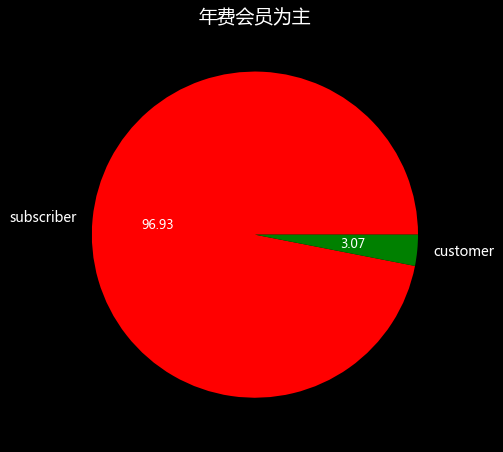

In [414]:
#一共有2类客户:普通客户与年度会员
usertypes=cb1['usertype'].value_counts()
ax=usertypes.plot.pie(labels=['subscriber', 'customer'],autopct='%.2f',colors=['red','green'],title='年费会员为主')
ax.set(ylabel='')
# ax.legend(['每个骑行持续时间段的骑行次数'])

In [439]:
usertypes

Subscriber    696886
Customer       22108
Name: usertype, dtype: int64

In [472]:
group_byGender=cb1['gender'].value_counts()
group_byGender

1    537589
2    151806
0     29599
Name: gender, dtype: int64

[Text(0, 0.5, '')]

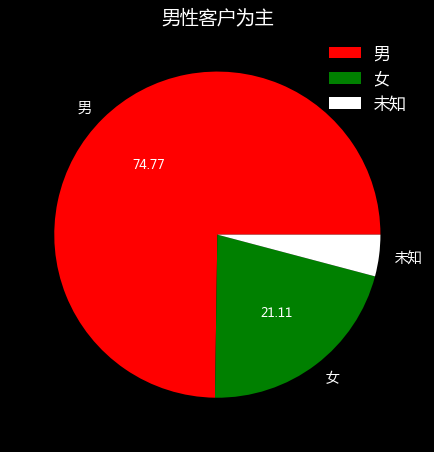

In [481]:
ax=group_byGender.plot.pie(labels=['男','女','未知'],autopct='%.2f',colors=['red','green','white'],title='男性客户为主')
ax.legend(['男','女','未知'])
ax.set(ylabel='')

In [494]:
#因为行索引已经指定了骑行的时间范围,如果计算平均值统计无意义!
group_byGenderAndtripduration=cb1.pivot_table('tripduration',index=['gender','group_tripduration'],aggfunc='sum').unstack(level=0)
group_byGenderAndtripduration
#效果一致:(cb1.groupby([cb1['gender'],cb1['group_tripduration']]).mean())[['tripduration']].unstack()

tripduration                    
gender                        0         1         2
group_tripduration                                 
0-2m                      35465   1235481    204796
2-5m                     740872  25836700   5783648
5-10m                   2915888  88246047  24012983
10-15m                  3565212  72000105  22884816
15-20m                  4036247  48910685  17065946
20-25m                  4994700  33633941  12204995
25-30m                  4441360  24215434   9027732
30-45m                  5639436  37426528  13200695
45-60m                  2074247   5159551   2129475
>60m                   22897457  29810057  15249387

In [498]:
group_byGender=cb1.groupby('gender').mean()
group_byGender[['tripduration','birth year']]
#无法解释:为什么男性的骑行平均时间短于女性????

tripduration   birth year
gender                           
0        2506.146728  1969.902058
1         733.099191  1977.902623
2         831.234615  1978.815225

In [503]:
cb1['birth year'].describe()
#最小出生年从1885到1948，暂不剔除不合理数据

count    718994.000000
mean       1977.765945
std          12.016931
min        1885.000000
25%        1969.000000
50%        1980.000000
75%        1988.000000
max        2002.000000
Name: birth year, dtype: float64

In [531]:
# cb_Year_0_70=cb1[cb1['birth year']>=1948]
# cb_Year_0_70.head()
# cb_Year_0_70.shape
#剔除70随以上的数据后，仍有711825记录，剔除影响较小

In [547]:
#将用户年龄进行装箱,分为22岁未毕业,未到而立的青年,而立壮年,中年,退休老年

bins=[0,22,30,40,55,200]#由于有部分异常年龄(出生年为1885及以后)的数据,故将最后设置200岁
group_yearname =['少年[0-22]','青年[22-30]','壮年[30-40]','中年[40-55]','老年[55-200]']
#将所有年龄装箱
cb1['group_year'] = pd.cut((2018-cb1['birth year']), bins, labels=group_yearname)

In [581]:
#由于加总后秒数太大,转换为小时H
tripduration_groupby_year_sum=(cb1['tripduration'].groupby(cb1['group_year']).sum())/(60*60)
tripduration_groupby_year_sum.head()

group_year
少年[0-22]       2817.323611
青年[22-30]     32316.185000
壮年[30-40]     42432.912778
中年[40-55]     62086.130833
老年[55-200]    25478.531111
Name: tripduration, dtype: float64

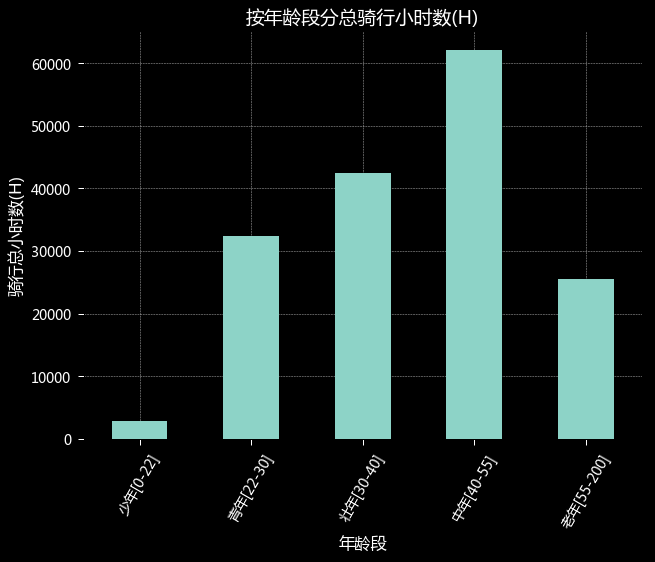

In [582]:
ax=tripduration_groupby_year_sum.plot('bar',title='按年龄段分总骑行小时数(H)')
ax.set(xlabel="年龄段", ylabel="骑行总小时数(H)")
ax.tick_params(axis='x', rotation=35)
#可见中年[40-55]岁的骑行时间最多

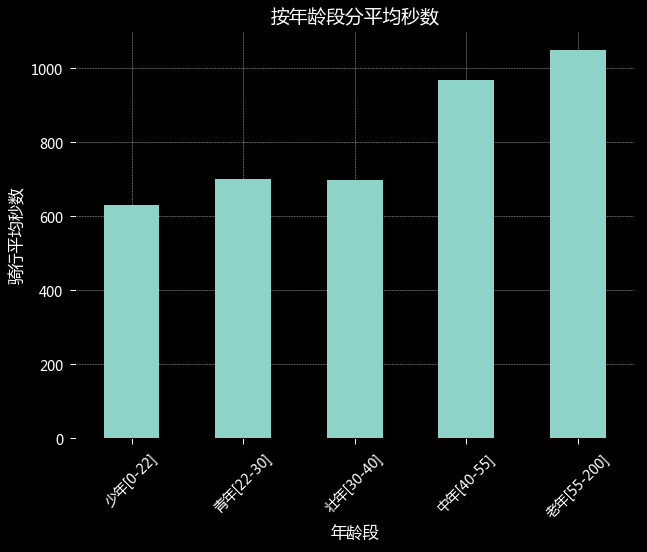

In [585]:
tripduration_groupby_year_mean=cb1['tripduration'].groupby(cb1['group_year']).mean()
ax=tripduration_groupby_year_mean.plot('bar',title='按年龄段分 每次骑行平均秒数')
ax.set(xlabel="年龄段", ylabel="骑行平均秒数")
ax.tick_params(axis='x', rotation=45)

#分年龄段平均骑行时间:40岁以上的中老年人反而骑行平均时间更长???
#岁数小的年龄段骑行时间段是因为骑得快??

In [591]:
# tripduration_groupby_year_gender=cb1[['group_year','tripduration','gender']].groupby(['group_year','gender']).sum()
# tripduration_groupby_year_gender

#按照年龄及性别分组统计
#由于加总后秒数太大,转换为小时数H
tripduration_groupby_year_gender_sum=(cb1.pivot_table('tripduration',index=['group_year','gender'],aggfunc='sum').unstack(level=1))/(60*60)
tripduration_groupby_year_gender_sum

tripduration                            
gender                 0             1             2
group_year                                          
少年[0-22]       18.665833   2079.351111    719.306667
青年[22-30]     134.994444  22339.191667   9841.998889
壮年[30-40]     261.593889  30646.854167  11524.464722
中年[40-55]   20116.640556  33066.298333   8903.191944
老年[55-200]     73.504444  21342.210556   4062.816111

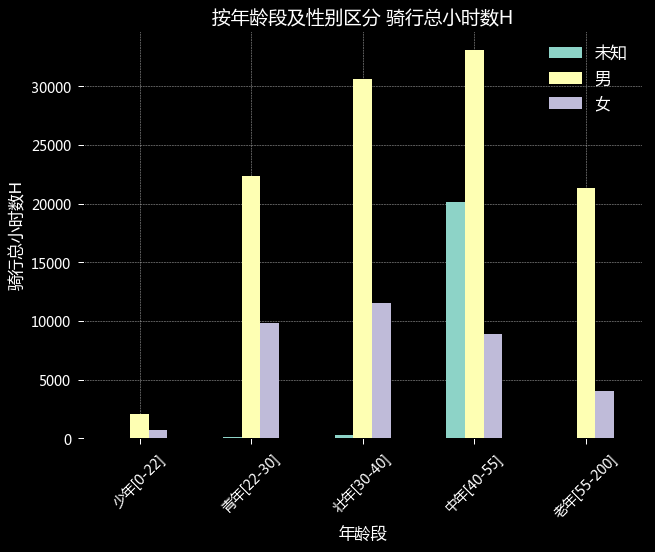

In [600]:
ax=tripduration_groupby_year_gender_sum.plot(kind='bar',title='按年龄段及性别区分 骑行总小时数H')
ax.set(xlabel="年龄段", ylabel="骑行总小时数H")
ax.tick_params(axis='x', rotation=45)
ax.legend(['未知','男','女'])

#各个年龄段的男性骑行时间总数均大大超过女性骑行时间总数,因为男性客户总数大大超过女性客户总数

# 中年段(40-55)出现大量未知性别的骑行时间数?????原因何在??
## 需另外分析是否与时间有关?

In [598]:
len(cb1[cb1['gender']==0])
#可见性别为未知的记录数总共只有29599

29599

In [606]:
cb1['tripduration'][cb1['gender']==0].sum()
#性别为未知的总骑行时间总数

74179437

In [602]:
# 按照年龄段及性别 对比骑行平均秒数
tripduration_groupby_year_gender_mean=(cb1.pivot_table('tripduration',index=['group_year','gender'],aggfunc='mean').unstack(level=1))
tripduration_groupby_year_gender_mean

tripduration                         
gender                0            1           2
group_year                                      
少年[0-22]     622.194444   615.749280  673.998959
青年[22-30]    820.912162   644.704548  865.801530
壮年[30-40]    650.371547   647.434555  886.364710
中年[40-55]   2679.539202   734.788487  772.362307
老年[55-200]   624.094340  1125.281320  780.643574

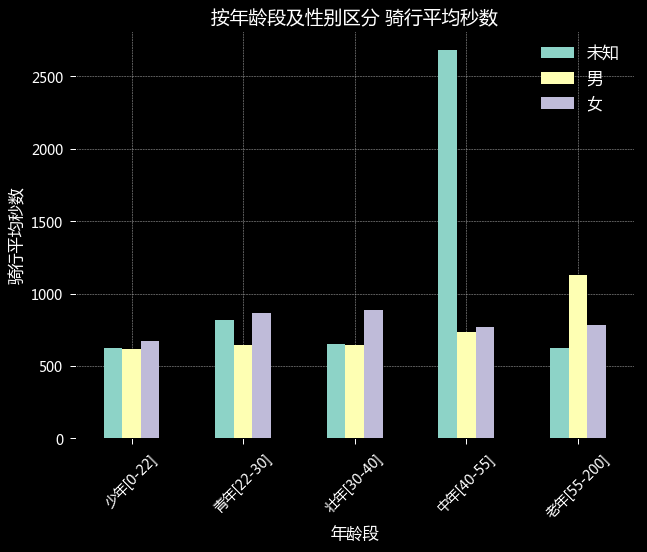

In [603]:
ax=tripduration_groupby_year_gender_mean.plot(kind='bar',title='按年龄段及性别分组对比 骑行平均秒数')
ax.set(xlabel="年龄段", ylabel="骑行平均秒数")
ax.tick_params(axis='x', rotation=45)
ax.legend(['未知','男','女'])

#各个年龄段的男性骑行平均时间 一般都小于 女性骑行平均时间

# 未知性别的40-55岁区间段的骑行平均时间明显异常!!!

In [605]:
cb1['tripduration'][cb1['gender']==0].mean()
#性别为未知的总骑行时间总数

2506.1467279299977

In [611]:
# 性别是否填写与年龄的关系
# groupby_year_gender=(cb1.pivot_table('tripduration',index=['group_year','gender'],aggfunc='mean').unstack(level=1))
groupby_year_gender=(cb1.groupby(['group_year','gender']).count())['bikeid'].unstack()
groupby_year_gender

gender          0       1      2
group_year                      
少年[0-22]      108   12157   3842
青年[22-30]     592  124741  40923
壮年[30-40]    1448  170409  46807
中年[40-55]   27027  162004  41498
老年[55-200]    424   68278  18736

In [619]:
groupby_year_gender.sum().sum()
#核对总记录数无误

718994

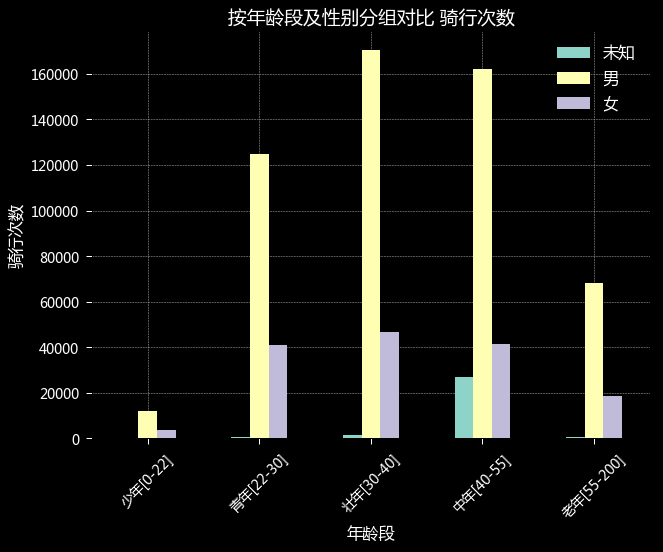

In [734]:
ax=groupby_year_gender.plot(kind='bar',title='按年龄段及性别分组对比 骑行次数')
ax.set(xlabel="年龄段", ylabel="骑行次数")
ax.tick_params(axis='x', rotation=45)
ax.legend(['未知','男','女'])

In [616]:
groupby_year_gender/(groupby_year_gender.sum(axis=1)[:,None])
#各年龄段 各性别占比: 40-55年龄段的未知性别远高于其他年龄段

gender             0         1         2
group_year                              
少年[0-22]    0.006705  0.754765  0.238530
青年[22-30]   0.003561  0.750295  0.246145
壮年[30-40]   0.006622  0.779319  0.214059
中年[40-55]   0.117239  0.702749  0.180012
老年[55-200]  0.004849  0.780873  0.214278

In [607]:
cb1.head()

tripduration               starttime                stoptime  \
0           970 2018-01-01 13:50:57.434 2018-01-01 14:07:08.186   
1           723 2018-01-01 15:33:30.182 2018-01-01 15:45:33.341   
2           496 2018-01-01 15:39:18.337 2018-01-01 15:47:35.172   
3           306 2018-01-01 15:40:13.372 2018-01-01 15:45:20.191   
4           306 2018-01-01 18:14:51.568 2018-01-01 18:19:57.642   

   start station id start station name  start station latitude  \
0                72   W 52 St & 11 Ave               40.767272   
1                72   W 52 St & 11 Ave               40.767272   
2                72   W 52 St & 11 Ave               40.767272   
3                72   W 52 St & 11 Ave               40.767272   
4                72   W 52 St & 11 Ave               40.767272   

   start station longitude  end station id         end station name  \
0               -73.993929             505          6 Ave & W 33 St   
1               -73.993929            3255          8 Ave & W 31 St   
2               -73.993929             525         W 34 St & 11 Ave   
3               -73.993929             447          8 Ave & W 52 St   
4               -73.993929            3356  Amsterdam Ave & W 66 St   

   end station latitude  end station longitude  bikeid    usertype  \
0             40.749013             -73.988484   31956  Subscriber   
1             40.750585             -73.994685   32536  Subscriber   
2             40.755942             -74.002116   16069  Subscriber   
3             40.763707             -73.985162   31781  Subscriber   
4             40.774667             -73.984706   30319  Subscriber   

   birth year  gender group_tripduration  group_year  
0        1992       1             15-20m   青年[22-30]  
1        1969       1             10-15m   中年[40-55]  
2        1956       1              5-10m  老年[55-200]  
3        1974       1              5-10m   中年[40-55]  
4        1992       1              5-10m   青年[22-30]

# 待续:
# 用户在每周(工作日、休息日)的骑行趋势是什么样的?周六周日的时间是否涉及到美国的时区问题,夏令时?
# 每个季度(冬季夏季)?如何划分季度更合适?
# 除了气温以外，还有哪些因素影响了用户对Citi Bike的使用？

In [663]:
#  1代表周一 7代表周七
cb1['xingQi']=cb1['starttime'].dt.weekday+1
#添加一列数据(显示每行星期几)
groupby_xingQi_hour=(cb1.groupby(['xingQi',cb1.set_index('starttime').index.hour]))['tripduration'].count()
#分层索引,按照周几和出发时点分组,对出发次数加总统计
workday=groupby_xingQi_hour.loc[[1,2,3,4,5]]
#筛选出工作日的数据
mean_groupbyStartTime_workday=workday.unstack(level=0).mean(axis=1)
#对工作日周一到周五的数据进行按照时点分组算术平均
weekday=groupby_xingQi_hour.loc[[6,7]]
mean_groupbyStartTime_weekday=weekday.unstack(level=0).mean(axis=1)
#对休息日周六到周日的数据按照时点分组算术平均
week_compare_work=pd.DataFrame({'weekday':mean_groupbyStartTime_weekday,'workday':mean_groupbyStartTime_workday})
# 将2个数据合并到dataframe中

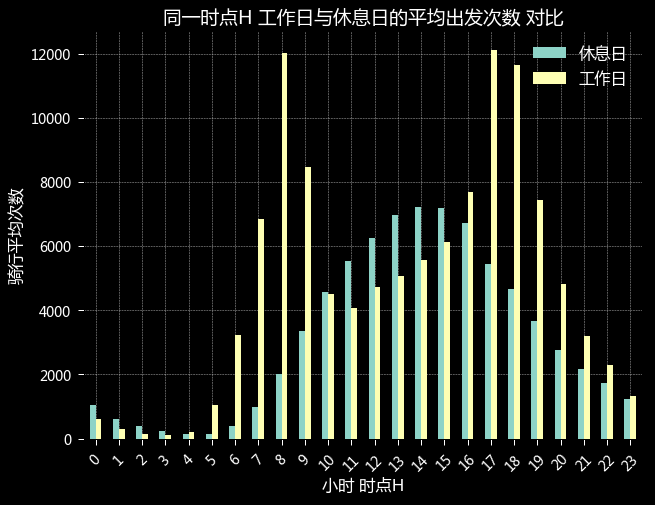

In [729]:
ax=week_compare_work.plot(kind='bar',title='同一时点H 工作日与休息日的平均出发次数 对比')
ax.set(xlabel="小时 时点H", ylabel="骑行平均次数")
ax.tick_params(axis='x', rotation=45)
ax.legend(['休息日','工作日'])

#可见在两个时段,休息日相比工作日出发更多:
# 1、在凌晨0-3点可能是休息日外出 晚归人群所致,
# 2、10点-15点都比工作日外出量要大，开启休息模式

#工作日呈现明显的双高峰,而休息日则为单峰

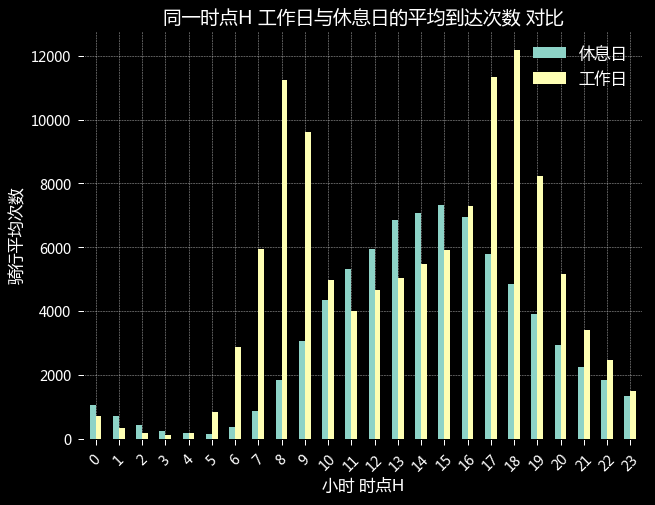

In [731]:
#1代表周一
#统计到达次数对比仍然采用 出发时的星期几而不再计算到达时的星期几
groupby_stopTime_xingQi_hour=(cb1.groupby(['xingQi',cb1.set_index('stoptime').index.hour]))['tripduration'].count()
workday=groupby_stopTime_xingQi_hour.loc[[1,2,3,4,5]]
mean_groupbyStopTime_workday=workday.unstack(level=0).mean(axis=1)
weekday=groupby_stopTime_xingQi_hour.loc[[6,7]]
mean_groupbyStopTime_weekday=weekday.unstack(level=0).mean(axis=1)
week_compare_work=pd.DataFrame({'weekday':mean_groupbyStopTime_weekday,'workday':mean_groupbyStopTime_workday})
ax=week_compare_work.plot(kind='bar',title='同一时点H 工作日与休息日的平均到达次数 对比')
ax.set(xlabel="小时 时点H", ylabel="骑行平均次数")
ax.tick_params(axis='x', rotation=45)
ax.legend(['休息日','工作日'])

#休息日平均到达次数超过工作日 出现在2个时间段：1、凌晨0-3点，2、11-15点
#显然休息日睡得晚的人更多，起的晚的人更多

# 综合考虑，在导入数据时应该将每行数据增加以下列：
 1、增加列 显示是否工作日或休息日
 
 2、增加列 显示年龄
 
 或者另外新建表